In [1]:
import numpy as np
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install emoji
import emoji
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

C:\Users\86518\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\86518\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\86518\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\86518\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\86518\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\86518\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
sainsburys_df = pd.read_json('sainsburys.json')

In [3]:
sainsburys_df.head()

created_at                   id               id_str  \
0 2020-12-02 21:25:42  1334247396054798336  1334247396054798336   
1 2020-03-25 08:55:11  1242736777103839237  1242736777103839237   
2 2020-03-15 18:07:30  1239251894293409797  1239251894293409797   
3 2020-10-18 10:43:27  1317778311729369088  1317778311729369088   
4 2020-11-07 20:52:20  1325179302384717824  1325179302384717824   

                                                text display_text_range  \
0  RT @felixprojectuk: Today we collected some fo...               None   
1  @ocado @tesco @sainsburys @asda @waitrose @Mor...               None   
2  RT @Danwhite1972: Dear panic buyers\n\nPlease ...               None   
3  @daisy_haggard @sainsburys Can’t wait to see w...           [27, 79]   
4  @lordrix @sainsburys But Sainsbury's have made...          [21, 140]   

                                              source  truncated  \
0  <a href="http://twitter.com/download/iphone" r...      False   
1  <a href="http://twitter.com/download/iphone" r...       True   
2  <a href="http://twitter.com/#!/download/ipad" ...      False   
3  <a href="http://twitter.com/download/iphone" r...      False   
4  <a href="http://twitter.com/download/android" ...       True   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0                    NaN                        NaN                  NaN  ...   
1                    NaN                        NaN         2.015550e+07  ...   
2                    NaN                        NaN                  NaN  ...   
3           1.317512e+18               1.317512e+18         2.875019e+09  ...   
4           1.325169e+18               1.325169e+18         5.496380e+07  ...   

    matching_rules                                   retweeted_status  \
0  [{'tag': None}]  {'created_at': 'Wed Dec 02 13:30:07 +0000 2020...   
1  [{'tag': None}]                                               None   
2  [{'tag': None}]  {'created_at': 'Sun Mar 15 08:55:18 +0000 2020...   
3  [{'tag': None}]                                               None   
4  [{'tag': None}]                                               None   

  quoted_status_id quoted_status_id_str quoted_status quoted_status_permalink  \
0              NaN                  NaN          None                    None   
1              NaN                  NaN          None                    None   
2              NaN                  NaN          None                    None   
3              NaN                  NaN          None                    None   
4              NaN                  NaN          None                    None   

                                      extended_tweet  possibly_sensitive  \
0                                               None                None   
1  {'full_text': '@ocado @tesco @sainsburys @asda...                None   
2                                               None                None   
3                                               None                None   
4  {'full_text': "@lordrix @sainsburys But Sainsb...                None   

   extended_entities  scopes  
0               None     NaN  
1               None     NaN  
2               None     NaN  
3               None     NaN  
4               None     NaN  

[5 rows x 37 columns]

In [4]:
sainsburys_df.count()

created_at                   82821
id                           82821
id_str                       82821
text                         82821
display_text_range           45732
source                       82820
truncated                    82821
in_reply_to_status_id        40277
in_reply_to_status_id_str    40277
in_reply_to_user_id          49755
in_reply_to_user_id_str      49755
in_reply_to_screen_name      48705
user                         82821
geo                             60
coordinates                     60
place                         2335
contributors                     0
is_quote_status              82821
quote_count                  82821
reply_count                  82821
retweet_count                82821
favorite_count               82821
entities                     82821
favorited                    82821
retweeted                    82821
filter_level                 82821
lang                         82821
matching_rules               82821
retweeted_status    

# Data pre-preparation

In [5]:
selected_data = sainsburys_df[['created_at', 'text', 'extended_tweet']]
selected_data.head()

created_at                                               text  \
0 2020-12-02 21:25:42  RT @felixprojectuk: Today we collected some fo...   
1 2020-03-25 08:55:11  @ocado @tesco @sainsburys @asda @waitrose @Mor...   
2 2020-03-15 18:07:30  RT @Danwhite1972: Dear panic buyers\n\nPlease ...   
3 2020-10-18 10:43:27  @daisy_haggard @sainsburys Can’t wait to see w...   
4 2020-11-07 20:52:20  @lordrix @sainsburys But Sainsbury's have made...   

                                      extended_tweet  
0                                               None  
1  {'full_text': '@ocado @tesco @sainsburys @asda...  
2                                               None  
3                                               None  
4  {'full_text': "@lordrix @sainsburys But Sainsb...

The needed list of data is selected from the database and they are composed into a new dataset. Since there is a lot of data, the data needs to be selected for a specific period by the posting time of the comments.

The data in the column *created_at* needs to be changed to a date format, after which it can be filtered by month. Here the data of three months from the beginning of October 2020 to the end of December 2020 is selected.

In [6]:
selected_data['created_at'] = pd.to_datetime(selected_data['created_at'])

chosen_data = selected_data[(selected_data['created_at'].dt.month >= 10) & (selected_data['created_at'].dt.month <= 12)]

chosen_data.head()

C:\Users\86518\AppData\Local\Temp\ipykernel_14852\3074452322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['created_at'] = pd.to_datetime(selected_data['created_at'])


created_at                                               text  \
0  2020-12-02 21:25:42  RT @felixprojectuk: Today we collected some fo...   
3  2020-10-18 10:43:27  @daisy_haggard @sainsburys Can’t wait to see w...   
4  2020-11-07 20:52:20  @lordrix @sainsburys But Sainsbury's have made...   
6  2020-12-25 11:45:58  @Sir_Loin67 I bought myself a tin  of @sainsbu...   
10 2020-10-04 15:48:20  RT @plymuffmartin: @pringer22 @Mr__King_ @Lozz...   

                                       extended_tweet  
0                                                None  
3                                                None  
4   {'full_text': "@lordrix @sainsburys But Sainsb...  
6                                                None  
10                                               None

McKinney, W. (2020) *Data filtering example from pandas documentation*. Available at: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html (Downloaded: 29 April 2024).

In [7]:
chosen_data.shape

(32372, 3)

In order to examine the complete comment information, the portion within single quotes in the *extended_tweet* section needs to be extracted.
However, since this section is not in dictionary format, it cannot be extracted directly. So the content of this column is converted to dictionary format before fetching the content.

In [8]:
import ast
def parse_dict(text):
    try:
        return ast.literal_eval(text)
    except (ValueError, SyntaxError):
        return None 

chosen_data['extended_tweet'] = chosen_data['extended_tweet'].apply(parse_dict)

chosen_data['full_text'] = chosen_data['extended_tweet'].apply(lambda x: x.get('full_text', None) if isinstance(x, dict) else None)

C:\Users\86518\AppData\Local\Temp\ipykernel_14852\1508335802.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_data['extended_tweet'] = chosen_data['extended_tweet'].apply(parse_dict)
C:\Users\86518\AppData\Local\Temp\ipykernel_14852\1508335802.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_data['full_text'] = chosen_data['extended_tweet'].apply(lambda x: x.get('full_text', None) if isinstance(x, dict) else None)


Python Software Foundation (n.d.) *ast.literal_eval*. Available at: https://docs.python.org/3/library/ast.html#ast.literal_eval (Downloaded: 29 April 2024).

After extracting the *full_text* information from the *extended_tweet* column, the *text* column is filled into the None value of *extended_tweet*. In this way, the integrated comment information is obtained.

In [9]:
chosen_data['full_text'] = [y if x==None else x for x,y in zip(chosen_data['full_text'],chosen_data['text'])]

C:\Users\86518\AppData\Local\Temp\ipykernel_14852\1064778680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_data['full_text'] = [y if x==None else x for x,y in zip(chosen_data['full_text'],chosen_data['text'])]


In [10]:
chosen_data['full_text'].head(10)

0     RT @felixprojectuk: Today we collected some fo...
3     @daisy_haggard @sainsburys Can’t wait to see w...
4     @lordrix @sainsburys But Sainsbury's have made...
6     @Sir_Loin67 I bought myself a tin  of @sainsbu...
10    RT @plymuffmartin: @pringer22 @Mr__King_ @Lozz...
15    RT @daisy_haggard: Dear @sainsburys .. thank y...
19    RT @TitaniaMcGrath: Kudos to @sainsburys for b...
21    RT @greenjinn: 🎉WIN @seedandbean chocolate bar...
23    @PeterStefanovi2 Anybody worked out the CO2 fo...
25    @mr_plantgeek @sainsburys That happened to me....
Name: full_text, dtype: object

In [11]:
chosen_data = chosen_data[['created_at','full_text']]

In [12]:
chosen_data.count()

created_at    32372
full_text     32372
dtype: int64

Below is the process of cleaning the data. 
Firstly, the emoji expressions are converted to text, for example a smile or a sad emoji is converted to words. This gives a better representation of the emotion of the comment. After that remove the user name after the @ symbol. Then change the upper case of the text to lower case, remove special symbols, punctuation and numbers from the text. In the end, short words less than or equal to two letters are removed, as they are most likely personal pronouns or meaningless information.

In [13]:
def convert_emoji_to_text(text):
    return emoji.demojize(text)

def remove_usernames(text):
    return text.str.replace(r'@\w+', '', regex=True)

def to_lower(text):
    return text.str.lower()

def remove_url(text):
    return text.str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\'(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

def remove_email(text):
    return text.str.replace(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', regex=True)

def remove_punctuation(text):
    return text.str.replace(r'[^\w\s]', '', regex=True)

def remove_numbers_and_underscores(text):
    return text.str.replace(r'[\d_]', '', regex=True)

def remove_short_words(text):
    return text.str.replace(r'\b[a-zA-Z]{1,2}\b', '', regex=True)

chosen_data['full_text'] = chosen_data['full_text'].apply(convert_emoji_to_text)
chosen_data['full_text'] = remove_usernames(chosen_data['full_text']) 
chosen_data['full_text'] = to_lower(chosen_data['full_text'])
chosen_data['full_text'] = remove_url(chosen_data['full_text'])
chosen_data['full_text'] = remove_email(chosen_data['full_text'])
chosen_data['full_text'] = remove_punctuation(chosen_data['full_text'])
chosen_data['full_text'] = remove_numbers_and_underscores(chosen_data['full_text'])
chosen_data['full_text'] = remove_short_words(chosen_data['full_text'])

Carpedm20 (2020) *Emoji for Python*. Available at: https://github.com/carpedm20/emoji (Downloaded: 30 April 2024).

In [14]:
chosen_data.head(10)

created_at                                          full_text
0  2020-12-02 21:25:42    today  collected some food donated  shoppers...
3  2020-10-18 10:43:27    cant wait  see what  brings  today seenoevil...
4  2020-11-07 20:52:20    but sainsburys have made  big thing  their w...
6  2020-12-25 11:45:58    bought myself  tin    shortbread\nworst ive ...
10 2020-10-04 15:48:20          isnt though history  written and taugh...
15 2020-10-18 11:22:45    dear   thank you for thoughtfully substituti...
19 2020-10-03 12:38:45    kudos   for bravely confessing  its ethnicit...
21 2020-11-22 14:35:01    partypopperwin  chocolate bars partypopper\n...
23 2020-12-23 16:16:45                anybody worked out the  footprint  
25 2020-12-19 20:59:59    that happened    ordered  piece and got sent...

# data analysis

Bag of Words Analysis and TF-IDF Analysis are performed on the reviews.

Bag of Words Analysis on the full_text column:


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\86518\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


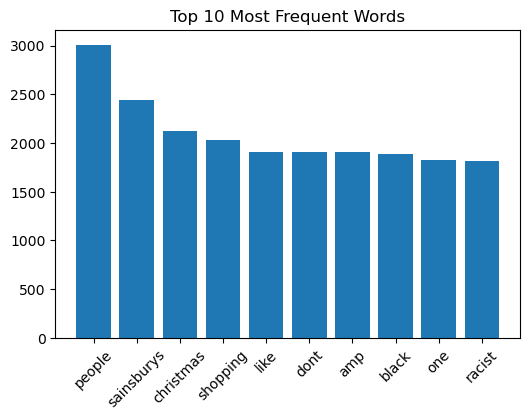


TF-IDF Analysis on the full_text column:


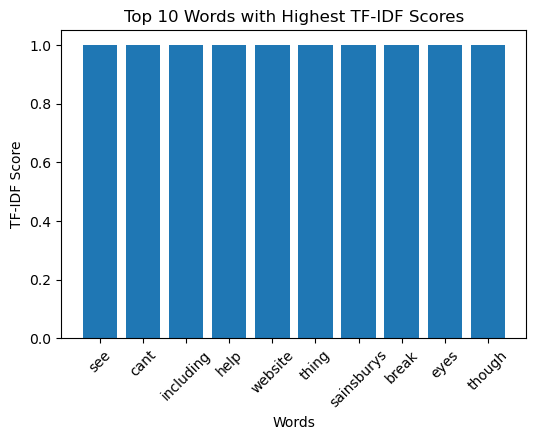

In [15]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

nltk.download('stopwords')

# Bag of Words Analysis
def bag_of_words_analysis(texts, stop_words):
    word_counts = Counter()
    for text in texts:
        words = [word for word in text.split() if word not in stop_words]
        word_counts.update(words)

    most_common = word_counts.most_common(10)
    words, counts = zip(*most_common)

    plt.figure(figsize=(6, 4))
    plt.bar(words, counts)
    plt.title("Top 10 Most Frequent Words")
    plt.xticks(rotation=45)
    plt.show()

    return most_common

# TF-IDF Analysis
def tf_idf_analysis(texts, stop_words, top_n=10):
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_array = np.array(vectorizer.get_feature_names_out())

    # Dictionary to keep track of words and their corresponding scores
    max_tfidf_dict = {}
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix.getrow(i)
        for word, score in zip(row.indices, row.data):
            feature_word = feature_array[word]
            max_tfidf_dict[feature_word] = max(max_tfidf_dict.get(feature_word, 0), score)

    # Sort words by their score and get top n
    sorted_words = sorted(max_tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:top_n]
    words, scores = zip(*sorted_words)

    plt.figure(figsize=(6, 4))
    plt.bar(words, scores)
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.title(f'Top {top_n} Words with Highest TF-IDF Scores')
    plt.xticks(rotation=45)
    plt.show()

    return sorted_words

stop_words = set(stopwords.words('english'))

print("Bag of Words Analysis on the full_text column:")
bow_results = bag_of_words_analysis(chosen_data['full_text'], stop_words)

print("\nTF-IDF Analysis on the full_text column:")
tfidf_results = tf_idf_analysis(chosen_data['full_text'], stop_words)

In [16]:
chosen_data.count()

created_at    32372
full_text     32372
dtype: int64

The data of text is cleaned and normalised by word form reduction to convert the words into their basic forms. This can help in subsequent sentiment analyses.

In [17]:
from nltk.stem import WordNetLemmatizer

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
chosen_data['full_text'] = chosen_data['full_text'].apply(lambda x: lemmatizer_on_text(x))

Assign sentiment values to each text by installing and using the *TextBlob*.

*TextBlob* is a Python library for working with text data that provides a simple *API* to perform common natural language processing tasks. It works by creating a *TextBlob* instance for each text to analyse the sentiment, and then obtaining a sentiment polarity value. The sentiment is then classified into three categories based on the polarity values.

In terms of the choice of polarity thresholds, as the analysis results of this model are not satisfactory when the thresholds are constantly adjusted, another model is chosen later to assign values to the text.

In [18]:
!pip install textblob
from textblob import TextBlob

def classify_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

chosen_data['sentiment'] = chosen_data['full_text'].apply(classify_sentiment)

Defaulting to user installation because normal site-packages is not writeable


Singh, V. (2023) *Sentiment Analysis with TextBlob: A Beginner's Guide*. Available at: https://codewithgolu.com/python/sentiment-analysis-with-text-blob-a-beginner-s-guide/ (Downloaded: 30 April 2024).

In [19]:
chosen_data.head()

created_at                                          full_text  \
0  2020-12-02 21:25:42    today  collected some food donated  shoppers...   
3  2020-10-18 10:43:27    cant wait  see what  brings  today seenoevil...   
4  2020-11-07 20:52:20    but sainsburys have made  big thing  their w...   
6  2020-12-25 11:45:58    bought myself  tin    shortbread\nworst ive ...   
10 2020-10-04 15:48:20          isnt though history  written and taugh...   

   sentiment  
0    neutral  
3    neutral  
4   negative  
6   negative  
10  negative

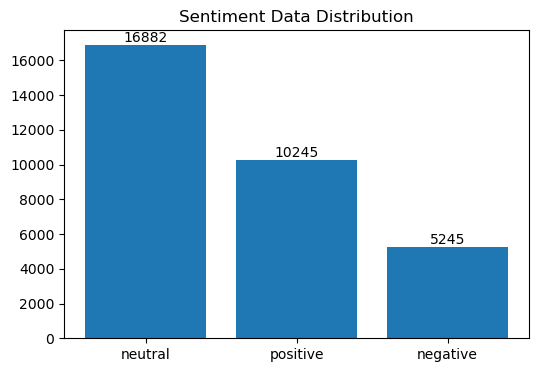

In [20]:
import matplotlib.pyplot as plt

val = chosen_data['sentiment'].value_counts()

plt.figure(figsize=(6,4)) 
plt.bar(val.index, val.values)
plt.title("Sentiment Data Distribution") 

for index, value in enumerate(val.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Defaulting to user installation because normal site-packages is not writeable


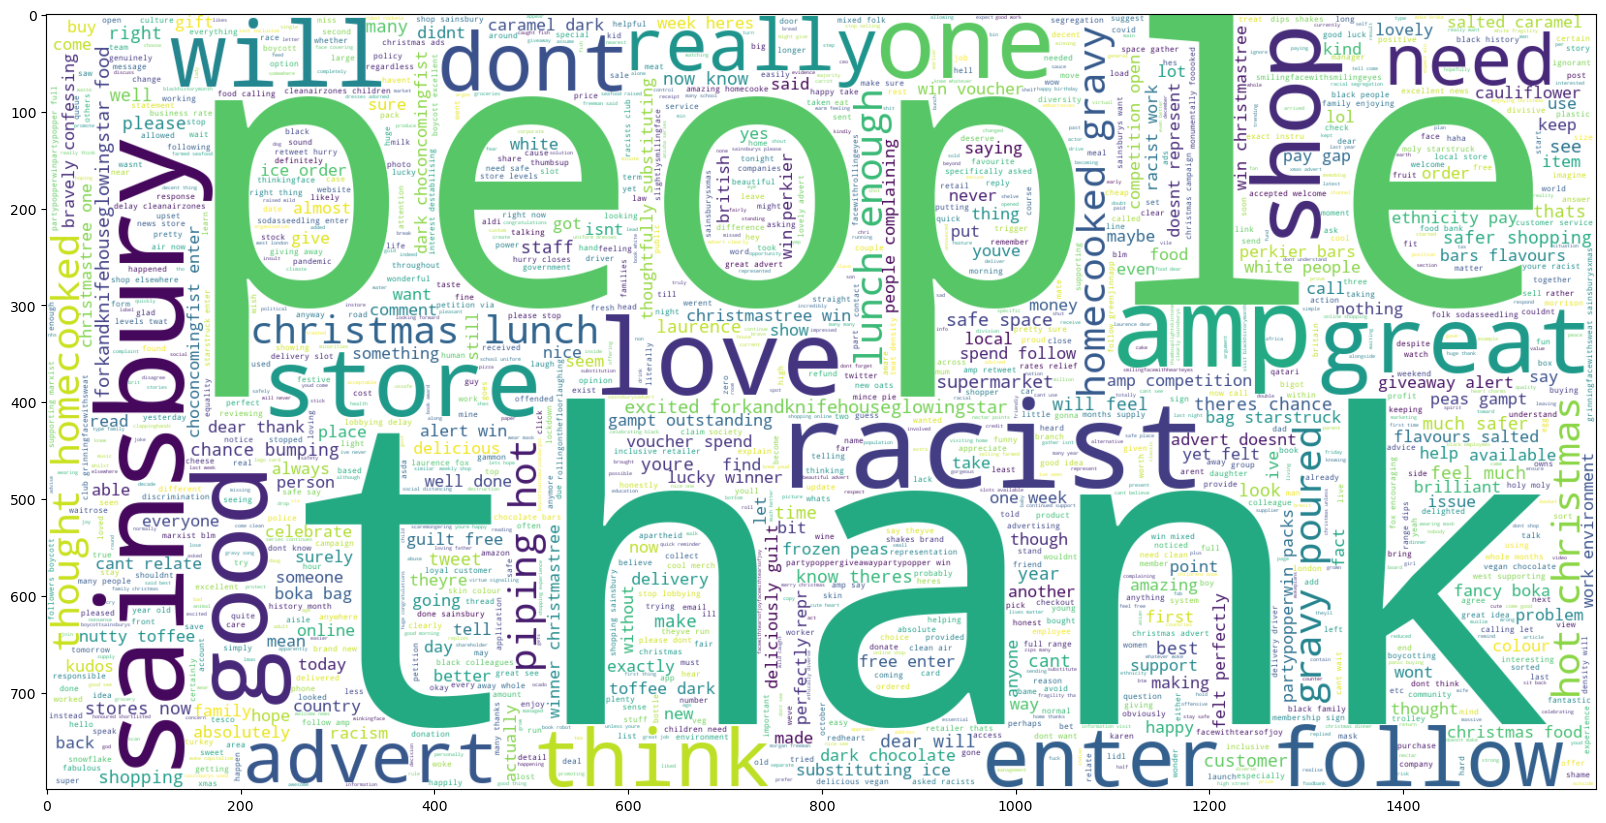

In [21]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(chosen_data[chosen_data.sentiment == 'positive'].full_text))
plt.imshow(wc , interpolation = 'bilinear')

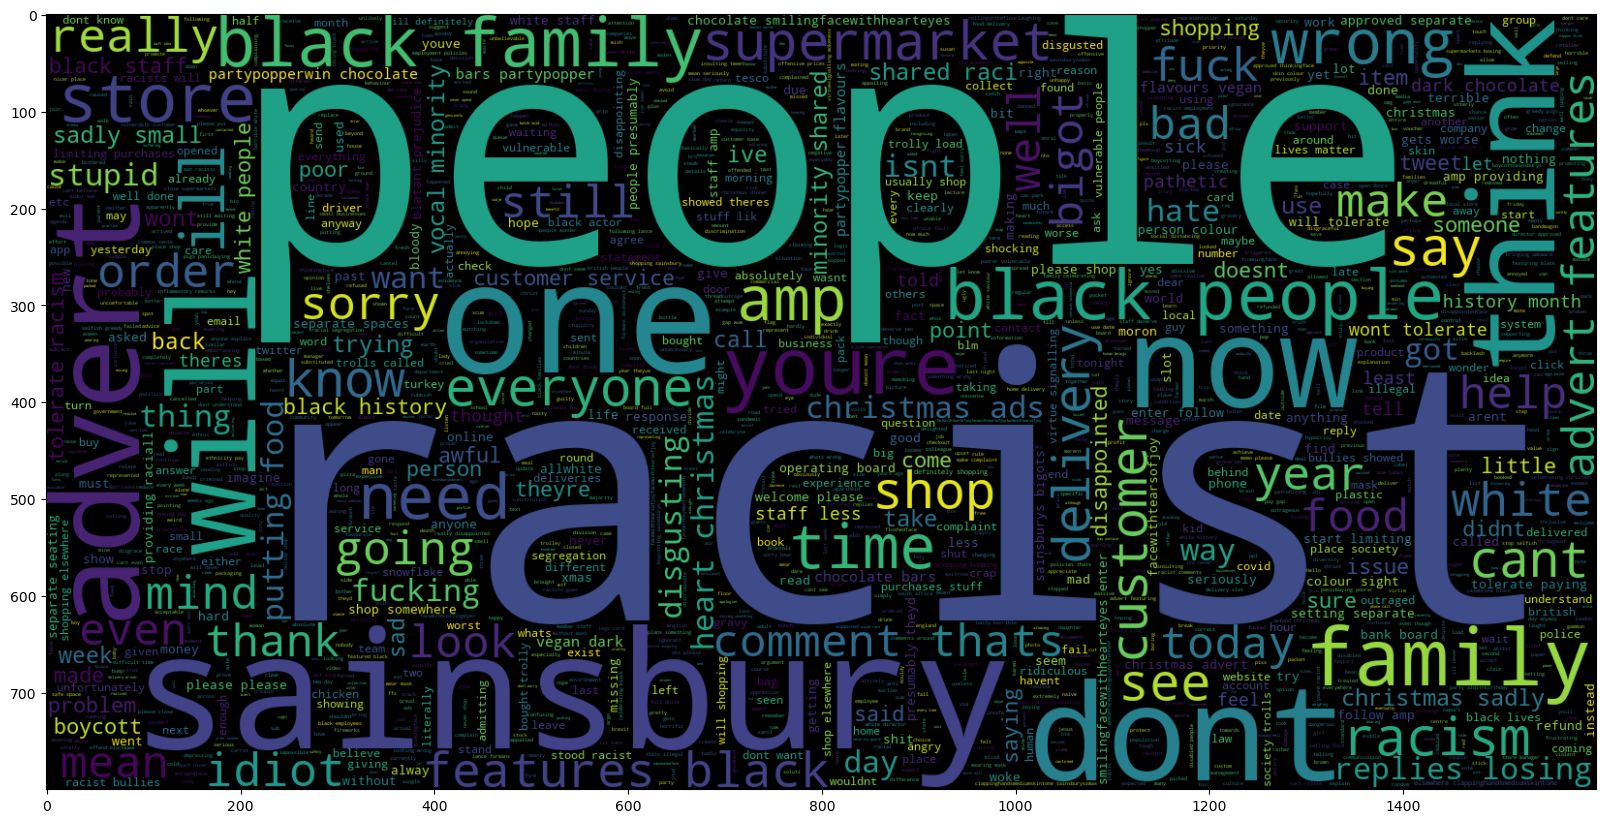

In [22]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(chosen_data[chosen_data.sentiment == 'negative'].full_text))
plt.imshow(wc , interpolation = 'bilinear')

Because the results analysed through *TextBlob* are not satisfactory, with too many comments being classified as neutral, a new tool is selected for assigning sentiment values to the text.

The *VADER* tool is a sentiment analysis tool for social media text optimisation. It works by downloading *VADER's* lexicon and then using the *SentimentIntensityAnalyzer* to calculate a sentiment score for each text, which reflects the text's positive, negative or neutral sentiment. The sentiment is then classified based on the compound scores and the results are stored in a new column in the dataset.

In [23]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

chosen_data['rating'] = chosen_data['full_text'].apply(sia.polarity_scores)

get_value = lambda d: d['compound']
chosen_data["sentiment_score"] = chosen_data["rating"].apply(get_value)

def fun(chosen_data):
  if chosen_data["sentiment_score"] >= 0.3:
    return 'positive'
  if chosen_data["sentiment_score"] <= -0.3:
    return 'negative'
  return 'neutral'

chosen_data["sentiment"] = chosen_data.apply(fun, axis=1)

chosen_data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\86518\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


created_at                                          full_text  \
0  2020-12-02 21:25:42    today  collected some food donated  shoppers...   
3  2020-10-18 10:43:27    cant wait  see what  brings  today seenoevil...   
4  2020-11-07 20:52:20    but sainsburys have made  big thing  their w...   
6  2020-12-25 11:45:58    bought myself  tin    shortbread\nworst ive ...   
10 2020-10-04 15:48:20          isnt though history  written and taugh...   

   sentiment                                             rating  \
0    neutral  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
3    neutral  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
4    neutral  {'neg': 0.052, 'neu': 0.869, 'pos': 0.079, 'co...   
6   negative  {'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...   
10   neutral  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

    sentiment_score  
0            0.0000  
3            0.0000  
4            0.2960  
6           -0.6249  
10           0.0000

Towards AI (n.d.) *Sentiment Analysis in Python Using VADER* [Online tutorial]. Available at: https://towardsai.net/p/nlp/sentiment-analysis-in-python-using-vader (Downloaded: 30 April 2024).

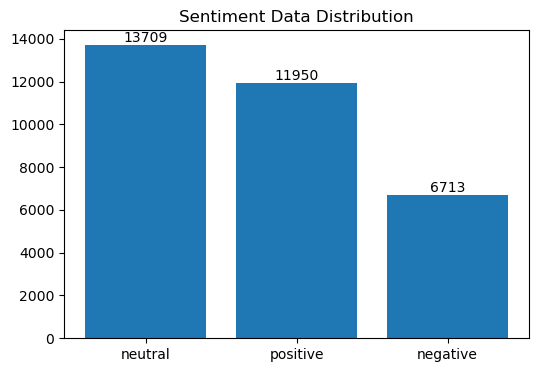

In [24]:
import matplotlib.pyplot as plt

val = chosen_data['sentiment'].value_counts()

plt.figure(figsize=(6,4)) 
plt.bar(val.index, val.values)
plt.title("Sentiment Data Distribution")

for index, value in enumerate(val.values):
    plt.text(index, value, str(value), ha='center', va='bottom') 

plt.show()

Defaulting to user installation because normal site-packages is not writeable


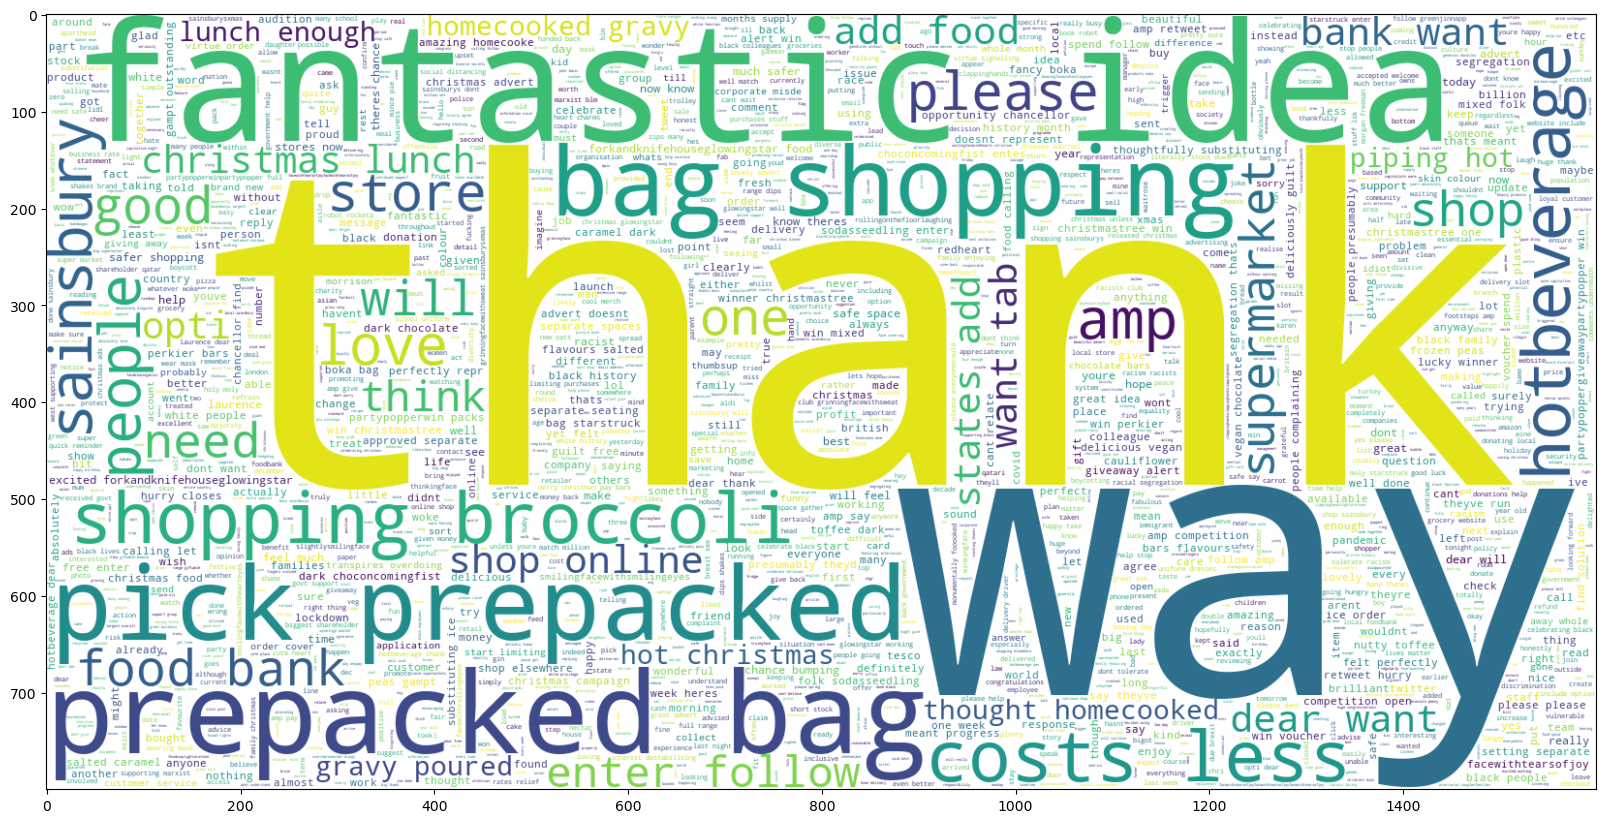

In [25]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(chosen_data[chosen_data.sentiment == 'positive'].full_text))
plt.imshow(wc , interpolation = 'bilinear')

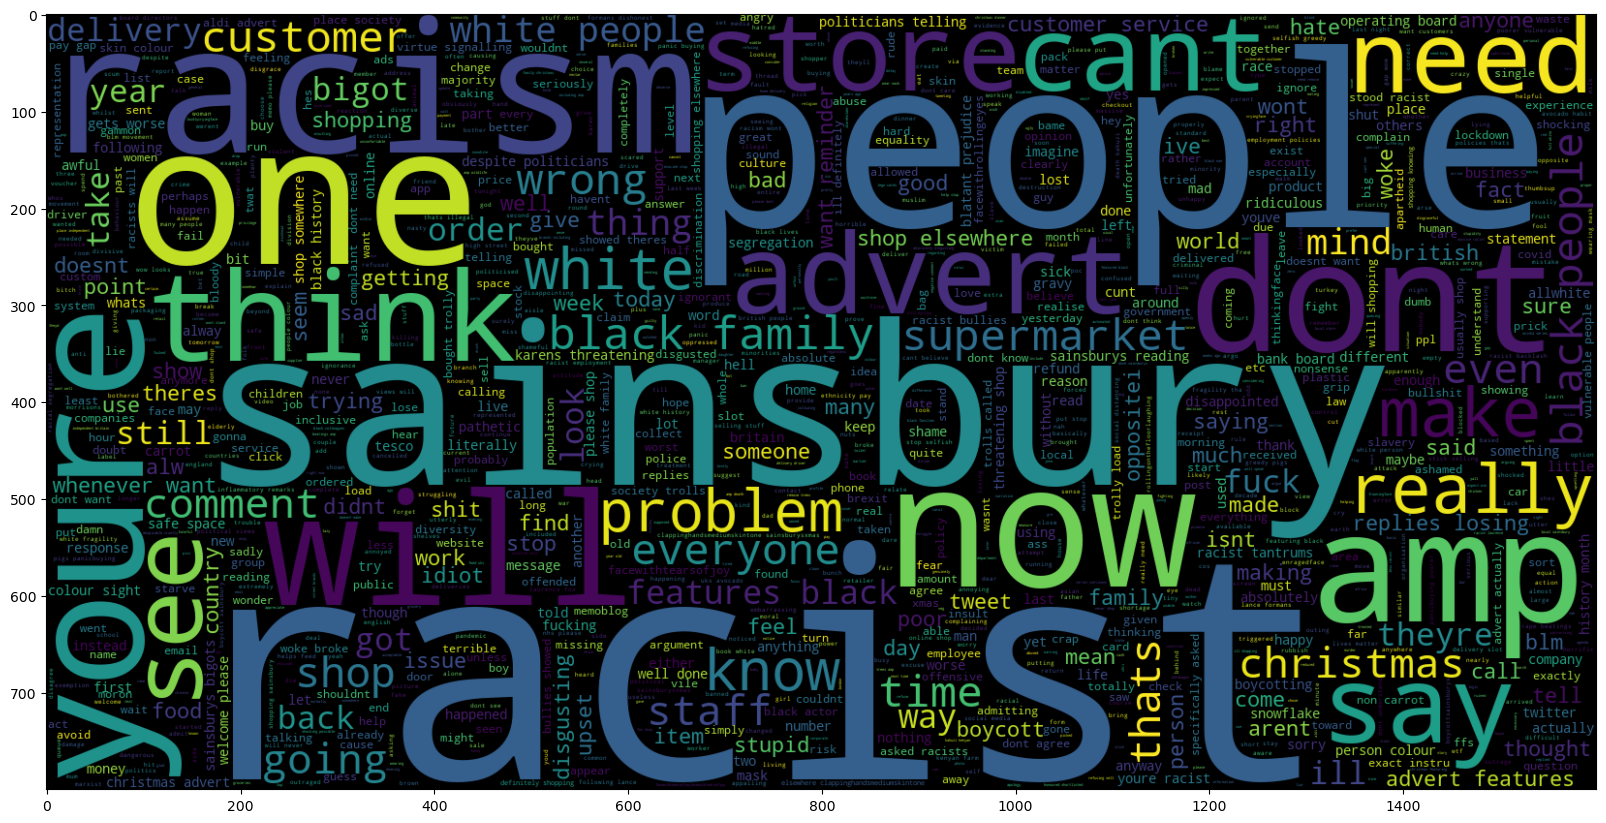

In [26]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(chosen_data[chosen_data.sentiment == 'negative'].full_text))
plt.imshow(wc , interpolation = 'bilinear')

# LDA analysis

In [27]:
chosen_data.head()

created_at                                          full_text  \
0  2020-12-02 21:25:42    today  collected some food donated  shoppers...   
3  2020-10-18 10:43:27    cant wait  see what  brings  today seenoevil...   
4  2020-11-07 20:52:20    but sainsburys have made  big thing  their w...   
6  2020-12-25 11:45:58    bought myself  tin    shortbread\nworst ive ...   
10 2020-10-04 15:48:20          isnt though history  written and taugh...   

   sentiment                                             rating  \
0    neutral  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
3    neutral  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
4    neutral  {'neg': 0.052, 'neu': 0.869, 'pos': 0.079, 'co...   
6   negative  {'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...   
10   neutral  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

    sentiment_score  
0            0.0000  
3            0.0000  
4            0.2960  
6           -0.6249  
10           0.0000

In [28]:
!pip install pyLDAvis
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models

Defaulting to user installation because normal site-packages is not writeable


In [29]:
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         # if word != '' and word not in stop_words:
        if word!='':
           words.append(word)
    return words
#storing the generated tokens in a new column named 'tokens'
chosen_data['tokens']=chosen_data.full_text.apply(generate_tokens)

In [30]:
chosen_data.head()

created_at                                          full_text  \
0  2020-12-02 21:25:42    today  collected some food donated  shoppers...   
3  2020-10-18 10:43:27    cant wait  see what  brings  today seenoevil...   
4  2020-11-07 20:52:20    but sainsburys have made  big thing  their w...   
6  2020-12-25 11:45:58    bought myself  tin    shortbread\nworst ive ...   
10 2020-10-04 15:48:20          isnt though history  written and taugh...   

   sentiment                                             rating  \
0    neutral  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
3    neutral  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
4    neutral  {'neg': 0.052, 'neu': 0.869, 'pos': 0.079, 'co...   
6   negative  {'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...   
10   neutral  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

    sentiment_score                                             tokens  
0            0.0000  [today, collected, some, food, donated, shoppe...  
3            0.0000  [cant, wait, see, what, brings, today, seenoev...  
4            0.2960  [but, sainsburys, have, made, big, thing, thei...  
6           -0.6249  [bought, myself, tin, shortbread\nworst, ive, ...  
10           0.0000  [isnt, though, history, written, and, taught, ...

In [31]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(chosen_data['tokens'])
print(id2word)

Dictionary(25364 unique tokens: ['alperton', 'and', 'branch', 'collected', 'donated']...)


After the lexicon generated before, each line of text is analysed to generate a vocabulary and matrix for each bag of words as a way to analyse the underlying themes of the text.

In [32]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(chosen_data['tokens'],id2word)
print(chosen_data['tokens'][0])
print(corpus[0])

['today', 'collected', 'some', 'food', 'donated', 'shoppers', 'branch', 'alperton', 'and', 'were', 'touched', 'find']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [33]:
print(chosen_data['tokens'].index)


Index([    0,     3,     4,     6,    10,    15,    19,    21,    23,    25,
       ...
       82796, 82799, 82800, 82801, 82803, 82806, 82814, 82817, 82818, 82819],
      dtype='int64', length=32372)


In [34]:
print(chosen_data['tokens'][3])
print(corpus[3])

['cant', 'wait', 'see', 'what', 'brings', 'today', 'seenoevilmonkey']
[(18, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)]


In [35]:
print(chosen_data['tokens'][4])
print(corpus[4])

['but', 'sainsburys', 'have', 'made', 'big', 'thing', 'their', 'website', 'that', 'they', 'will', 'all', 'they', 'can', 'help', 'the', 'vulnerable', 'including', 'telephone', 'line', 'where', 'those', 'who', 'not', 'have', 'pcs', 'are', 'not', 'especially', 'tech', 'savvy', 'can', 'place', 'their', 'order', 'teresting', 'see', 'how', 'that', 'works', 'out']
[(1, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1)]


The following code is used for visualising the results of the LDA model analysis, which can make it easy to understand the keywords contained in each theme. The validity of the model and the clarity of each theme can be assessed by observing the distribution and overlap between themes.

In [36]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=100, )

In [37]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30, n_jobs=1)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.031695  0.034330       1        1  23.095458
6     -0.018680 -0.101329       2        1  20.222910
8     -0.158890 -0.096902       3        1  14.013317
9     -0.126904  0.155934       4        1   7.813875
1      0.129009 -0.236501       5        1   7.647129
2      0.388241 -0.114287       6        1   6.384311
0      0.011538  0.312518       7        1   5.954464
5     -0.185881 -0.303787       8        1   5.482715
3     -0.358756  0.128560       9        1   5.135498
7      0.288627  0.221463      10        1   4.250324, topic_info=         Term          Freq         Total Category  logprob  loglift
84        you  11145.000000  11145.000000  Default  30.0000  30.0000
166      your   5970.000000   5970.000000  Default  29.0000  29.0000
41        the  18776.000000  18776.000000  Default  28.0000  28.0000
273      want   1480.000000   1480.000000  Default  27.0000  27.0000
253  shopping   2041.000000   2041.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
134       our    200.760650   1468.330388  Topic10  -4.5916   1.1684
428    people    234.845908   3089.124600  Topic10  -4.4348   0.5815
135      this    261.828821   5353.528619  Topic10  -4.3260   0.1404
194    advert    145.178125   1297.794418  Topic10  -4.9157   0.9677
26        how    144.770286   1381.790856  Topic10  -4.9186   0.9022

[693 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
212       1  0.031479        \n
212       3  0.092016        \n
212       4  0.039954        \n
212       5  0.001211        \n
212       6  0.291788        \n
...     ...       ...       ...
874       3  0.024873  yourself
874       4  0.037310  yourself
874       7  0.889210  yourself
874       8  0.031091  yourself
874       9  0.012437  yourself

[1715 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 9, 10, 2, 3, 1, 6, 4, 8])